In [ ]:
# SVM Classification for SID

In [1]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
# Install necessary libraries
!pip install nltk scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
path = "/content/drive/MyDrive/Saddam_Sir/Thesis/Dataset/Merged-file-_1_.csv"
df = pd.read_csv(path )

# Preprocess text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(str(text).lower())

    # Remove stopwords and non-alphanumeric characters
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    # Stemming and Lemmatization
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]

    # Reconstruct the cleaned text
    cleaned_text = ' '.join(lemmatized_words)

    return cleaned_text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).fillna(99999)
df.replace([np.inf, -np.inf], np.nan).dropna()

,text,sentiment,cleaned_text
0,b'@SmurphySuzanne @Sunderland_GM And more coun...,1,b smurphysuzann countri align russia china nex...
1,b'RT @TatasenkoMana: This Method suicide 18 Da...,1,tatasenkomana method suicid 18 dazai explain o...
2,b'RT @ennui365: Why in the name of Vince Foste...,1,ennui365 name vinc foster heard sinc august fo...
3,b'@Alan_G_Smith_BC @diana_murphy613 @JustinTru...,0,b justintrudeau one drive someon suicid
4,"b""RT @sidhant: Turkey's mega Antalya Diplomati...",0,b rt sidhant turkey mega antalya diplomat foru...
...,...,...,...
1235,I am tired of being weak and destroyed.,1,tire weak destroy
1236,"Every religion fights a final, worldwide cru...",1,everi religion fight final worldwid crusad dea...
1237,should i stop wanting to be happy?,1,stop want happi
1238,I will spend the coming 207 days combing thr...,0,spend come 207 day comb scientif articl compil...


In [ ]:
# Split the data into features (X) and labels (y)
X = df['cleaned_text']
y = df['sentiment'] # Replace 'Class' with your target column name
y = y.tolist()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

In [ ]:
# Fit and transform on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [ ]:
# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Create and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Predict on the test data
y_pred = svm_classifier.predict(X_test_tfidf)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.9193548387096774
Confusion Matrix:
 [[ 47  12   0]
 [  8  41   0]
 [  0   0 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        59
           1       0.77      0.84      0.80        49
       99999       1.00      1.00      1.00       140

    accuracy                           0.92       248
   macro avg       0.88      0.88      0.88       248
weighted avg       0.92      0.92      0.92       248



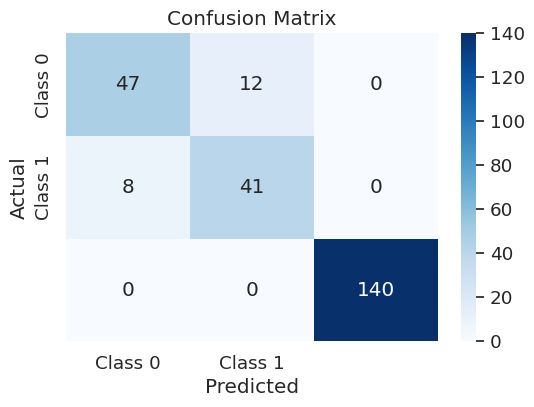

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace these values with your own
conf_matrix2 = np.array(conf_matrix)
# conf_matrix = np.array([[33, 4], [17, 9]])
classes = ['Class 0', 'Class 1']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font size as needed
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()